# LRT Replication 

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from LRT import censoring 

In [2]:
seed = 1917
np.random.seed(seed)

Read in LRT estimates 

In [3]:
model = censoring.read_censored_data('censored_estimates')

Simulate data and plot it

In [4]:
model.data = censoring.simulate(model, seed=seed)

## Add some noise and save income dataset 

Adding noise amounting to $\frac{1}{20}$ of the std. of $Y_1$. 

In [5]:
noise_std = np.std(model.data.logY[0,:]) / 20 

In [6]:
err = noise_std*np.random.normal(0, 1, model.data.logY.shape)
logY = model.data.logY + np.log(183.1) + err

In [7]:
T = 30
inc = pd.DataFrame(np.transpose(logY),columns=[f'age{t+30}' for t in range(T)])

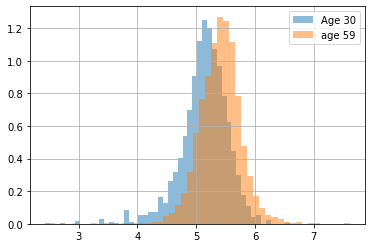

In [8]:
ax = inc.age30.hist(bins=50, density=True, alpha=.5, label='Age 30'); 
inc.age59.hist(ax=ax, bins=50, density=True, alpha=.5, label='age 59'); 
ax.legend(); 

# Export

In [9]:
inc.sample(frac=1/100, random_state=seed).to_csv('data/logY_p1.csv', header=False, index=False)
inc.sample(frac=10/100, random_state=seed).to_csv('data/logY_p10.csv', header=False, index=False)
inc.to_csv('data/logY_p100.csv', header=False, index=False)

## Unbalanced sample 

In [10]:
inc.sample(frac=1/100, random_state=seed).to_csv('data/logY_unbalanced_p1.csv', header=False, index=False)
inc.sample(frac=10/100, random_state=seed).to_csv('data/logY_unbalanced_p10.csv', header=False, index=False)
inc.to_csv('data/logY_unbalanced_p100.csv', header=False, index=False)

## Y zero cutoff 

In [11]:
inc = inc.apply(np.exp)
inc.sample(frac=1/100, random_state=seed).to_csv('data/Y_zerocutoff_p1.csv', header=False, index=False)
inc.sample(frac=10/100, random_state=seed).to_csv('data/Y_zerocutoff_p10.csv', header=False, index=False)
inc.to_csv('data/Y_zerocutoff_p100.csv', header=False, index=False)

## Birth years

Uniformly randomly sample birthyear in $\{1951, ..., 1955\}$. 

In [12]:
(T,N) = model.data.logY.shape
birthyears = pd.DataFrame(np.random.choice(np.arange(1951, 1956), size=(N,)), columns=['birthyear'])

fn = 'data/birthyear'
birthyears.to_csv(fn + '_p100.csv', header=False, index=False)
birthyears.sample(frac=1/100,  random_state=seed).to_csv(fn + '_p1.csv', header=False, index=False)
birthyears.sample(frac=10/100, random_state=seed).to_csv(fn + '_p10.csv', header=False, index=False)